In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
from os import listdir

In [3]:
import glob
import PIL
# normalise the data for faster training
from sklearn.preprocessing import StandardScaler

In [16]:
parasite_files = glob.glob('Parasitized/*.png')

In [67]:
parasite_pic = image.imread('Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')

In [68]:
print(parasite_pic.dtype)

float32


In [69]:
print(parasite_pic.shape)

(148, 142, 3)


In [20]:
uninfected_files = glob.glob('Uninfected/*.png')

In [21]:
SS = StandardScaler()

In [75]:
# convert the image from 3 channels to 1-channel
from skimage.color import rgb2gray, gray2rgb

gray_pic = rgb2gray(parasite_pic)

In [76]:
print(gray_pic.shape)

(148, 142)


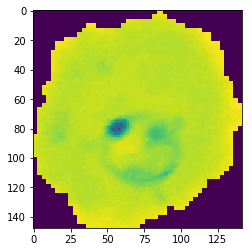

In [53]:
plt.imshow(gray_pic)

In [54]:
print(gray_pic.size)

21016


In [73]:
from PIL import Image

In [78]:
img = Image.open('Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')

In [84]:
resize = img.resize((100,100), Image.ANTIALIAS)

In [83]:
print(img.size)

(142, 148)


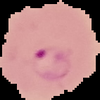

In [85]:
resize

In [86]:
print(resize.size)

(100, 100)


In [87]:
gray_resize = rgb2gray(resize)

AttributeError: 'Image' object has no attribute 'ndim'

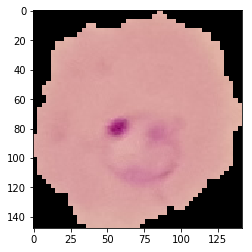

In [70]:
plt.imshow(parasite_pic)

In [12]:
from sklearn.preprocessing import normalize

In [13]:
normalize(gray_pic, axis=0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
print(gray_pic.shape)

(148, 142)


X_parasite = []
Y_parasite = []

In [92]:
X_paratest = []
Y_paratest = []
for file in parasite_files:
    image_d = Image.open(file)
    image_d = image_d.resize((100, 100), Image.ANTIALIAS)
    image_data = np.array(image_d)
    image_data = rgb2gray(image_data)
    image_data = normalize(image_data)
    image_data = image_data.flatten()
    X_paratest.append(image_data)
    Y_paratest.append(1)
    # append 1 to Y as target infected variable

In [89]:
print(image_data.shape)

(100, 100)


In [91]:
print(len(X_paratest))

13779


for file in parasite_files:
    image_data = image.imread(file)
    image_data = rgb2gray(image_data)
    image_data = normalize(image_data)
    image_data = image_data.flatten()
    X_parasite.append(image_data)
    Y_parasite.append(1)
    # append 1 to Y as target infected variable

In [94]:
X_uninfected = []
Y_uninfected = []
for file in uninfected_files:
    image_d2 = Image.open(file)
    image_d2 = image_d2.resize((100, 100), Image.ANTIALIAS)
    image_data2 = np.array(image_d2)
    image_data2 = rgb2gray(image_data2)
    image_data2 = normalize(image_data2)
    image_data2 = image_data2.flatten()
    X_uninfected.append(image_data2)
    Y_uninfected.append(0)
    # appent 0 to Y as target not infected

#### using image.flatten() turns the array from a matrix into a single row

In [91]:
print(image_data2.dtype)

float32


In [95]:
print(image_data.shape + image_data2.shape)

(10000, 10000)


In [46]:
print(image_data.shape)

(13189,)


In [96]:
# now to combine the images with their target variables
X = X_paratest + X_uninfected
Y = Y_paratest + Y_uninfected

In [121]:
# maybe dont need
# need to shuffle the data so its not biased
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)

#see if shuffle has a random seed so its reproducible

In [98]:
# split into training and test data
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [100]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn import linear_model

In [101]:
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1, multi_class='multinomial')
rbm = BernoulliRBM(random_state=0, verbose=True)
rbm_classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

In [102]:
X_train[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [103]:
rbm_classifier.fit(X_train, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1335.76, time = 95.36s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1334.57, time = 114.69s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1376.08, time = 112.60s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1363.51, time = 113.13s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1322.80, time = 112.67s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1351.92, time = 111.07s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1331.30, time = 109.13s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1425.61, time = 112.75s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1316.86, time = 108.78s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1341.25, time = 103.83s


Pipeline(memory=None,
     steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=256, n_iter=10,
       random_state=0, verbose=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=1, verbose=0, warm_start=False))])

In [101]:
#can't feed in a sequence of numbers inside the array as an element (array with an array) wont work in this case.

In [104]:
y_pred = rbm_classifier.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.562530237058539
